### Projeto Prático - *Reconhecimento de Dígitos*

Alunos:
- Júlia Moraes da Silva 20230014434
- Luiz Eduardo de Almeida Siqueira Silva 20230014210

#### Importando as bibliotecas

In [36]:
import numpy as np
from numpy import linalg as LA
import random
from random import sample
import matplotlib.pyplot as plt
import pandas as pd
import csv

#### Explicação do Dataset

Cada imagem é composta por 28 linhas e 28 colunas em um total de 784 pixels. Os dados de entrada (treino) possuem 785 colunas, a primeira coluna é chamada "label", identificando o dígito desenhado pelo usuário. O resto das colunas contém os valores de pixels da imagem associada. Cada coluna de pixel nos dados de treino, é nomeada "pixelx" onde x é um inteiro no intervalo [0,783]. Para localizar este pixel na imagem, x foi decomposto como x = i * 28 + j. Onde i e j são inteiros no intervalo [0,27]. 

Vamos inicar importando os csv.

#### Redução da dimensão das amostras 

In [2]:
treino = pd.read_csv('train.csv', sep=';')  
matriz_treino = treino.values


teste = pd.read_csv('test.csv', sep=';')
matriz_teste = teste.values

In [3]:

def acessar_imagem(dataset, indice):
    """
    Acessa uma imagem do dataset e retorna a imagem 28x28 e o label.
    
    Args:
        dataset (numpy.ndarray): O dataset contendo imagens e labels.
        indice (int): O índice da imagem a ser acessada.
    Returns:
        tuple: Uma tupla contendo a imagem 28x28 e o label (ou None se não houver label).
    """

    # Verificar se temos dados válidos
    if dataset.shape[1] >= 785:
    # Dataset com label
        label = dataset[indice, 0] 
        pixels = dataset[indice, 1:785] 
    
        #  Só faz reshape se temos 784 pixels
        if len(pixels) == 784:
            imagem_28x28 = pixels.reshape(28, 28)
        else:
            print(f"ERRO: {len(pixels)} pixels encontrados, esperado 784")
        
    elif dataset.shape[1] == 784:
    # Dataset só com pixels
        pixels = dataset[indice]
        label = None
    
    #print(f"Dataset label : {label}")
    #print(f"Pixels: {len(pixels)}")
    
    imagem_28x28 = pixels.reshape(28, 28)

    return imagem_28x28, label
    

In [4]:
def visualizar_imagem(imagem_28x28, label):
    """
    Visualiza uma imagem 28x28
    
    Parâmetros:
    - imagem_28x28: matriz 28x28 com os pixels da imagem
    - label: o dígito da imagem 
    
    
    Retorna:
    - imagem plotada com título indicando o dígito (ou 'Imagem do Dataset' se label for None)
    """
    
    if imagem_28x28.shape != (28, 28):
        print(f"ERRO: Formato incorreto {imagem_28x28.shape}. Esperado (28, 28)")
        return None
    
    # Criar título da imagem
    if label is not None:
        titulo = f'Dígito: {label}'
    else:
        titulo = 'Imagem do Dataset'
    
    # Plotar a imagem
    plt.figure(figsize=(6, 6))
    plt.imshow(imagem_28x28, cmap='gray')
    plt.title(titulo)
    plt.axis('off')
    plt.show()
    
    

In [5]:
def intensidade_imagem(imagem):
    """
    Calcula a intensidade de preto de uma imagem.

    l =  ∑ (i=0 até 783)(pixel_i)/255
    
    Parâmetros:
    - imagem: matriz 28x28 com os valores dos pixels
    
    Retorna:
    - intensidade: aproximação da quantidade de pixels pretos na imagem 
    """

    intensidade =  np.sum(imagem)/255
     
    return intensidade
    

In [6]:
def simetria_imagem(imagem):
    """
    Calcula a simetria de uma imagem.

    s_v =  ∑ (i=0 até 27)(j=0 até 13) || pixel_ij - pixel_i(27-j) ||/255

    s_h = ∑ (i=0 até 13)(j=0 até 27) || pixel_ij - pixel_(27-i)j ||/255

    s = s_v + s_h

    Parâmetros:
    - imagem: matriz 28x28 com os valores dos pixels
    
    Retorna:
    - simetria: medida de simetria da imagem 
    """
    s_v = 0
    s_h = 0
    simetria = 0
    for i in range(28):
        for j in range(14):
            s_v += np.abs(imagem[i, j] - imagem[i, 27 - j])

    s_v /= 255

    for i in range(14):
        for j in range(28):
            s_h += np.abs(imagem[i, j] - imagem[27 - i, j])

    s_h /= 255

    simetria = s_v + s_h
    
    return simetria


In [7]:
def informs (dataset, indice):
    """
    Função para extrair informações de uma imagem em um conjunto de dados.
    
    """
    info = []
    
    imagem, label = acessar_imagem(dataset, indice)
    info.append(label)
    intensidade = intensidade_imagem(imagem)
    info.append(intensidade)
    simetria = simetria_imagem(imagem)
    info.append(simetria)
        
    return info


Criando os arquivos com a redução das dimensões das amostras. O primeiro elemento será o label, seguido pela intensidade e pela simetria. Fizemos isso tanto para treino como para teste.

In [38]:
for i in range(len(matriz_treino)):
    dados = informs(matriz_treino, i)
    with open("train_redu.csv", mode="a", newline="", encoding="utf-8") as arquivo:
        escritor = csv.writer(arquivo, delimiter=";")  # separador ;
        escritor.writerow(dados)

In [39]:
for i in range(len(matriz_teste)):
    dados = informs(matriz_teste, i)
    with open("test_redu.csv", mode="a", newline="", encoding="utf-8") as arquivo:
        escritor = csv.writer(arquivo, delimiter=";")  # separador ;
        escritor.writerow(dados)

#### Classificação dos dígitos 1 x 5 

Separando em treino e em teste apenas as imagens com 1 e 5.

In [8]:

# Carregar os dados (ajuste o caminho do arquivo)
df_train_redu = pd.read_csv('train_redu.csv', sep=';', header=None, 
                 names=['label', 'intensidade', 'simetria'])

# Filtrar apenas as linhas com label 1 ou 5
df_train_1x5 = df_train_redu[df_train_redu['label'].isin([1, 5])]

df_train_1x5.shape

df_train_1x5

,label,intensidade,simetria
425,1,44.701961,69.270588
426,1,59.850980,83.443137
427,1,48.552941,79.043137
428,1,69.435294,72.878431
429,1,51.541176,84.611765
...,...,...,...
2181,5,105.686275,133.890196
2182,5,113.050980,116.698039
2183,5,110.725490,133.019608
2184,5,99.305882,132.133333


In [9]:
# Carregar os dados (ajuste o caminho do arquivo)
df_test_redu = pd.read_csv('test_redu.csv', sep=';', header=None, 
                 names=['label', 'intensidade', 'simetria'])

# Filtrar apenas as linhas com label 1 ou 5
df_test_1x5 = df_test_redu[df_test_redu['label'].isin([1, 5])]

df_test_1x5.shape

df_test_1x5

,label,intensidade,simetria
218,1,51.639216,71.443137
219,1,51.674510,85.050980
220,1,44.847059,72.674510
221,1,50.760784,81.945098
222,1,57.788235,72.564706
...,...,...,...
1110,5,96.121569,139.521569
1111,5,98.439216,130.729412
1112,5,95.141176,122.227451
1113,5,106.882353,128.007843


In [10]:
train_1 = df_train_1x5[df_train_1x5['label'] == 1]
train_5 = df_train_1x5[df_train_1x5['label'] == 5]

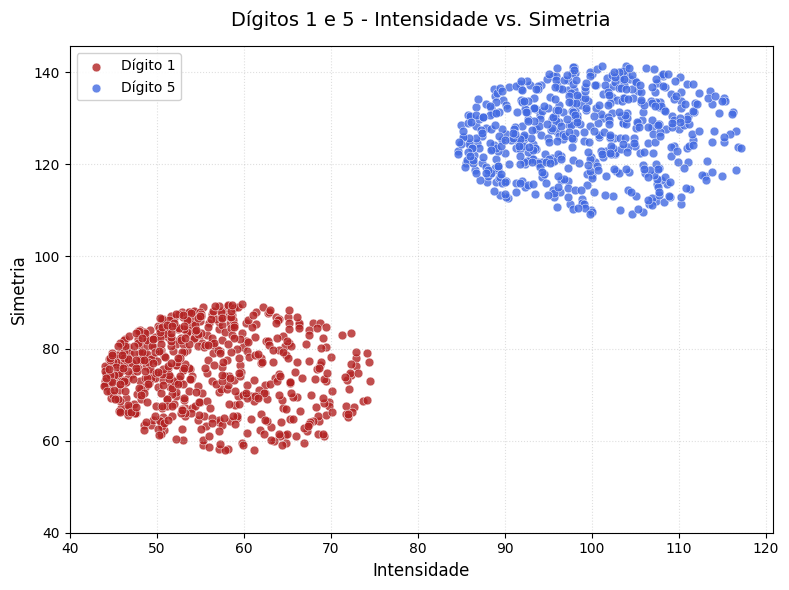

In [11]:
plt.figure(figsize=(8, 6)) 

plt.scatter(train_1['intensidade'], train_1['simetria'], 
           c='firebrick', s=40, edgecolor='white', linewidth=0.4, 
           label='Dígito 1', alpha=0.8)

plt.scatter(train_5['intensidade'], train_5['simetria'], 
           c='royalblue', s=40, edgecolor='white', linewidth=0.4, 
           label='Dígito 5', alpha=0.8)


plt.xlabel('Intensidade', fontsize=12)
plt.ylabel('Simetria', fontsize=12)
plt.title('Dígitos 1 e 5 - Intensidade vs. Simetria', pad=15, fontsize=14)


plt.legend(frameon=True, framealpha=0.9, facecolor='white')
plt.grid(True, linestyle=':', alpha=0.4)

# Ajuste automático dos limites
plt.xlim(left=40) 
plt.ylim(bottom=40)  

plt.tight_layout()  
plt.show()

In [12]:
# Construção do vetor X onde X = {(intensidade, simetria)}
X_train = []

for i in range(len(df_train_1x5)):
    intensidade = float(df_train_1x5.iloc[i]['intensidade'])
    simetria = float(df_train_1x5.iloc[i]['simetria'])
    X_train.append((intensidade, simetria))

print(X_train)

# Construção do vetor y onde y = +1 para label = 1 e y = -1 para label = 5
y_train = []

for i in range(len(df_train_1x5)):
    if df_train_1x5.iloc[i]['label'] == 1:
        y_train.append(1)
    else:
        y_train.append(-1)

print(y_train)

[(44.70196078431373, 69.27058823529413), (59.85098039215686, 83.44313725490196), (48.55294117647059, 79.04313725490195), (69.43529411764706, 72.87843137254902), (51.54117647058823, 84.61176470588235), (46.674509803921566, 80.4), (48.09803921568628, 79.08235294117648), (46.819607843137256, 78.14117647058823), (56.51764705882353, 79.01176470588236), (63.15294117647059, 62.86274509803921), (48.02745098039216, 77.78823529411764), (47.8235294117647, 82.16470588235293), (52.22745098039216, 69.70980392156864), (48.12549019607843, 72.88627450980391), (60.87058823529412, 69.74117647058824), (48.831372549019605, 78.8313725490196), (52.64705882352941, 72.66666666666667), (53.78431372549019, 75.52941176470588), (45.94117647058823, 75.65490196078431), (63.63529411764706, 73.50588235294117), (51.62745098039216, 82.08627450980393), (54.95294117647059, 68.28235294117647), (54.090196078431376, 74.11764705882354), (58.13725490196079, 89.25490196078431), (57.14509803921569, 84.18039215686275), (47.611764

##### Percepton

In [13]:

class Perceptron:
    def __init__(self):
        self.w = None  # Vetor de pesos (será inicializado no fit)
    
    def fit(self, X, y):
        """
        """
        # Adiciona termo de bias e inicializa pesos
        X_bias = np.insert(X, 0, 1, axis=1)
        self.w = np.zeros(X_bias.shape[1])
        
        # Algoritmo PLA
        lista_pci = self._pontos_classificados_incorretamente(X_bias, y)
        
        iteracao = 0
        while len(lista_pci) > 0:
            # Escolhe ponto aleatório
            x_i, y_i = lista_pci[np.random.randint(len(lista_pci))]
            
            # Atualiza pesos
            self.w += y_i * x_i
            
            # Atualiza lista de pontos incorretos
            lista_pci = self._pontos_classificados_incorretamente(X_bias, y)
    
    def _pontos_classificados_incorretamente(self, X_bias, y):
        """
        """
        return [(x_i, y_i) for x_i, y_i in zip(X_bias, y) 
                if np.sign(self.w @ x_i) != y_i]
    

In [19]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
print("Pesos finais:", perceptron.w)


Pesos finais: [4918.          -24.31764706  -30.90196078]


##### Regressão Linear

In [56]:
class RegressaoLinear:
    def __init__(self):
        self.w = None

    def fit (self, X, y):
        """ 
        Calcula a pseudo inversa
        X ja deve conter a coluna de bias (1) na primeira coluna

        """
       
        # tranformando de lista pra array numpy
        X = np.array(X)
        y = np.array(y)

        #se faltar a coluna bias adiciona 
        if not np.all(X[:, 0] == 1):
            X = np.c_[np.ones((X.shape[0], 1)), X]

        self.w = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict (self, X):
        # Se faltar a coluna de bias adiciona
        if X.shape[1] + 1 == self.w.shape[0]:
            X = np.c_[np.ones((X.shape[0], 1)), X]
        
        return np.sign(X @ self.w)


In [61]:
regressao_linear = RegressaoLinear()
regressao_linear.fit(X_train, y_train)
print(regressao_linear.w)

[ 3.58751288 -0.01875499 -0.02111635]


##### Regressão Logística

In [157]:
class RegressaoLogistica:
    def __init__(self, eta=0.1, tmax=1000, bs=1_000_000):
        self.eta = eta #passo
        self.tmax = tmax # maximo de interacoes
        self.batch_size = bs # tamanho do lote
        self.w = None

    def fit(self, X, y):
        """
        Infere o vetor w da função hipótese
        Minimização do erro de entropia cruzada pelo gradiente da descida 
        
        """
        
        X = np.array(X)
        y = np.array(y)
        N = X.shape[0]
        d = X.shape[1]

        self.w = np.zeros(d) # inicializa os pesos

        for t in range(self.tmax):
            # batch completo ou ammostra
            if self.batch_size < N:
                index = sample(range(N), self.batch_size)
                X_batch = np.array([X[i] for i in index])
                y_batch = np.array([y[i] for i in index])
            else: 
                X_batch = X
                y_batch = y

            somatorio = np.zeros(d)
            for i in range(X_batch.shape[0]):
                xi = X_batch[i]
                yi = y_batch[i]

                somatorio += (yi * xi) /  (1 + np.exp(yi * (np.dot(self.w, xi))))
            
            #gradiente médio entropia cruzada
            gt = (-1/N) * somatorio
                
            # se o graidente for pequeno aciona o criitério de parada
            if LA.norm(gt) < 1e-3:
                print(f"Critério de parada atingido em {t+1} iterações")
                break

            self.w = self.w - (self.eta * gt)

        else:
            print(f"Máximo de iterações ({self.tmax}) atingido sem convergir")

        print(f"Quantidade de iterações = {t+1}")
        return self.w
    
    # probabilidade da classe 1 (numero entre 0 e 1)
    def predict_prob(self, X):
        return 1 / (1 + np.exp(-np.dot(X, self.w)))

    # predição de classe — sinal de w·x
    def predict(self, X):
        return np.sign(np.dot(X, self.w))

    def getW(self):
        return self.w

    # Ajuste para vetor w de tamanho 2 (sem intercept)
    # Reta de decisão: w1*x + w2*y = 0 => y = -(w1/w2)*x
    # coeficiente angular
    def getRegressionY(self, regressionX):
        # coeficiente angular
        a = - self.w[0] / self.w[1]
        # intercept (aqui zero, pois não há termo independente)
        b = 0
        return a * regressionX + b
                

In [175]:
regressao_logisitca = RegressaoLogistica(eta=0.5, tmax=5000, bs=50)
regressao_logisitca.fit(X_train, y_train)

Máximo de iterações (5000) atingido sem convergir
Quantidade de iterações = 5000


array([-3.02001195,  1.15935627])

#### Plot das Fronteiras

In [161]:
def plot_fronteira(X,data_1, data_5, w1, w2= None, w3=None, title='Classificação', cor1='k--', cor2='g--'):
    """
    Plota a fronteira de decisão de um ou dois classificadores lineares.
    
    X_train : array 2D com features (sem coluna de bias)
    train_1, train_5 : DataFrames com as features 'intensidade' e 'simetria'
    w1 : vetor de pesos do primeiro classificador [w0, w1, w2]
    w2 : (opcional)
    w2 : (opcional) vetor de pesos do segundo classificador
    title : título do gráfico
    cor1 : cor da primeira linha
    cor2 : cor da segunda linha (se w2 for fornecido)
    """

    # Adiciona coluna de bias
    X_bias = np.insert(np.array(X_train, dtype=float), 0, 1, axis=1)
    
    # Valores mínimos e máximos do eixo X
    x_vals = np.array([X_bias[:, 1].min(), X_bias[:, 1].max()])

    # Função interna para calcular y da reta
    def calcula_y(w):
        w0, w1_coef, w2_coef = w
        return (-w0 - w1_coef * x_vals) / w2_coef

    plt.figure(figsize=(8, 6))

    # Pontos das classes
    plt.scatter(train_1['intensidade'], train_1['simetria'], 
                c="#FC3737", s=80, edgecolor='white', linewidth=0.5, 
                label='Dígito 1', alpha=0.8)
    plt.scatter(train_5['intensidade'], train_5['simetria'], 
                c='#4E79A7', s=80, edgecolor='white', linewidth=0.5, 
                label='Dígito 5', alpha=0.8)

    # Linha do primeiro classificador
    y_vals1 = calcula_y(w1)
    plt.plot(x_vals, y_vals1, cor1, linewidth=2, label='Fronteira 1')

    # Linha do segundo classificador, se fornecido
    if w2 is not None:
        y_vals2 = calcula_y(w2)
        plt.plot(x_vals, y_vals2, cor2, linewidth=2, label='Fronteira 2')

    if w3 is not None:
        y_vals3 = calcula_y(w3)
        plt.plot(x_vals, y_vals3, cor2, linewidth=2, label='Fronteira 3')

    # Áreas de decisão (opcional)
    plt.fill_between(x_vals, y_vals1, y_vals1-10, color='red', alpha=0.05)
    plt.fill_between(x_vals, y_vals1, y_vals1+10, color='blue', alpha=0.05)
    

    plt.xlabel('Intensidade', fontsize=12)
    plt.ylabel('Simetria', fontsize=12)
    plt.title(title, pad=15, fontsize=14)
    plt.legend(frameon=True, framealpha=0.9, facecolor='white')
    plt.grid(True)

    y_max = max(train_1['simetria'].max(), train_5['simetria'].max()) * 1.1
    plt.ylim(bottom=40, top=y_max)
    plt.xlim(left=40)

    plt.tight_layout()
    plt.show()

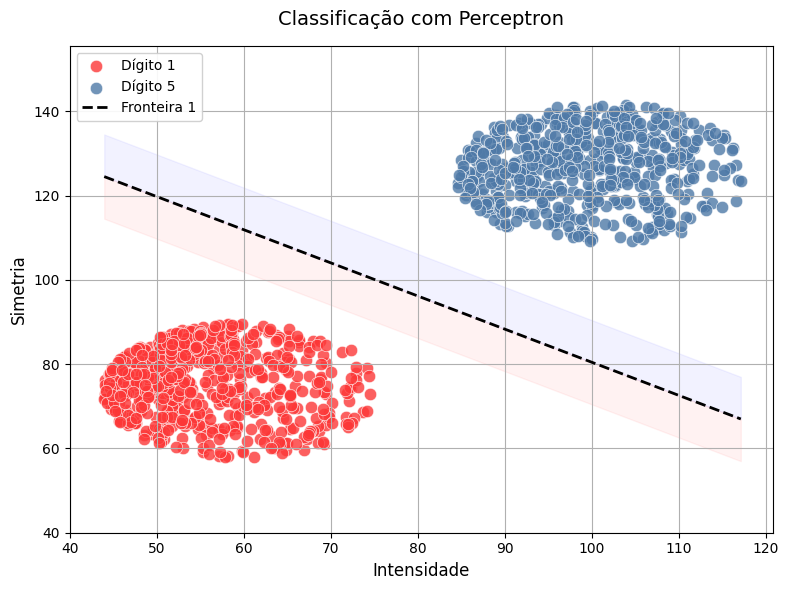

In [162]:
plot_fronteira(X_train, train_1, train_5, perceptron.w, title='Classificação com Perceptron', cor1='k--')

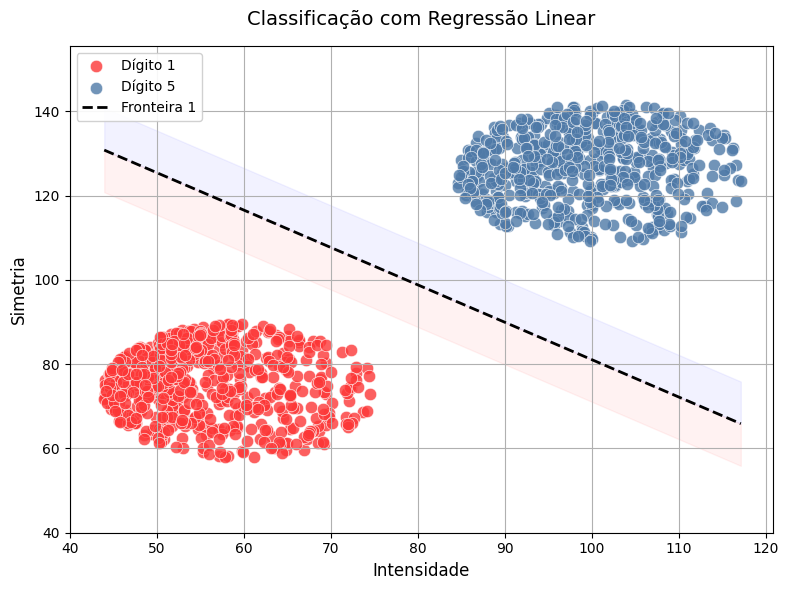

In [163]:
plot_fronteira(X_train, train_1, train_5, regressao_linear.w, title='Classificação com Regressão Linear', cor1='k--')

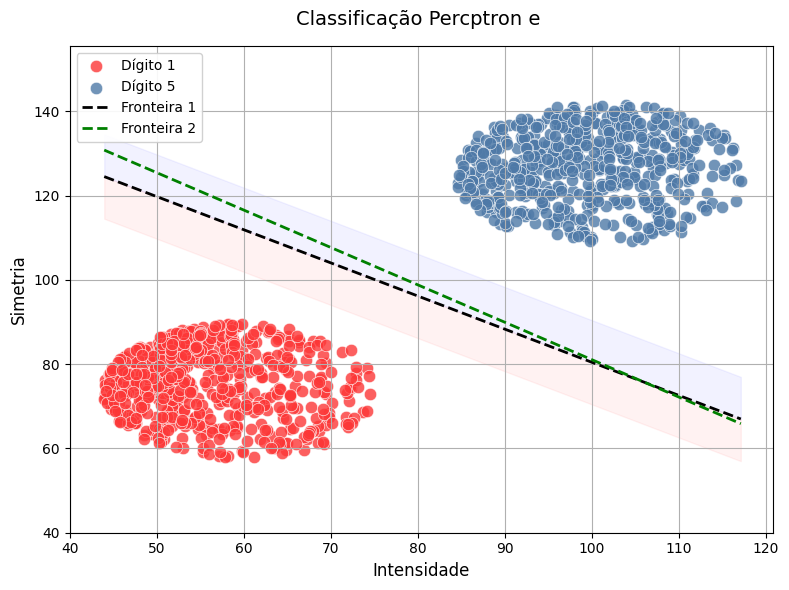

In [164]:
plot_fronteira(X_train, train_1, train_5, perceptron.w, regressao_linear.w, title='Classificação Percptron e ', cor1='k--', cor2='g--')